# Analysis for Figure 1b plate reader data

In [2]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random
import os
from functools import reduce
from itertools import chain
from sympy import factorint
import glob
from sklearn.utils import shuffle

from scipy.stats import ttest_ind


In [3]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 7
cm = 1/2.54
fig_folder = './Figure_1_exports'
data_folder = '../all_data/Figure_1_data'

## Read in data and plot

In [5]:
data = pd.read_excel('/'.join([data_folder,'Fig1B-plate_reader_data.xlsx']))

,rxn_label,DNA_name,DNA_conc,Liposome_conc,pmol,pmol_sub_nolipo,p-val,mean_diff,score,Liposome_name,Mg,SecYE,K,PEG
0,AqpZ-1,AqpZ,5,3,7.030161,3.790737,0.000109,4.039171,1,DMPC,8,0.0,85,2
1,AqpZ-1,AqpZ,5,3,7.431387,4.191963,0.000109,4.039171,1,DMPC,8,0.0,85,2
2,AqpZ-1,AqpZ,5,3,8.053077,4.813653,0.000109,4.039171,1,DMPC,8,0.0,85,2
3,AqpZ-1,AqpZ,5,3,6.599753,3.360329,0.000109,4.039171,1,DMPC,8,0.0,85,2
4,AqpZ-1,AqpZ,5,0,3.325580,0.086157,0.000109,4.039171,1,no_lipo,8,0.0,85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Cat-4,Cat,5,3,6.285052,-1.608591,0.000736,-2.006281,0,DOPC,8,0.0,185,2
103,Cat-4,Cat,5,0,7.489804,-0.403839,0.000736,-2.006281,0,no_lipo,8,0.0,185,2
104,Cat-4,Cat,5,0,7.961781,0.068138,0.000736,-2.006281,0,no_lipo,8,0.0,185,2
105,Cat-4,Cat,5,0,8.522443,0.628801,0.000736,-2.006281,0,no_lipo,8,0.0,185,2


<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
C:\Users\conar\AppData\Local\Temp\ipykernel_12220\1039378800.py:8: SyntaxWarning: invalid escape sequence '\c'
  sns.swarmplot(data=nolipo,x='rxn_label',y='pmol',hue='DNA_name',ax=ax,palette='Set1',s=3,hue_order=['AqpZ','Blank','Cat'],marker="$\circ$", edgecolor="face")
C:\Users\conar\AppData\Local\Temp\ipykernel_12220\1039378800.py:23: SyntaxWarning: invalid escape sequence '\c'
  sns.swarmplot(data=nolipo, x='rxn_label', y='pmol_sub_nolipo', hue='DNA_name',ax=ax,palette='Set1',s=3,hue_order=['AqpZ','Blank','Cat'],marker="$\circ$", edgecolor="face")


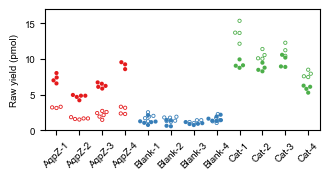

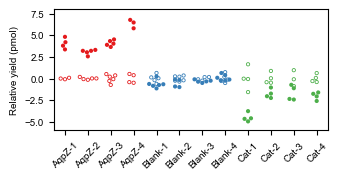

In [23]:
height = 4
fig,ax = plt.subplots(figsize=[9*cm,height*cm])

temp = data.copy()
lipo = temp[temp['Liposome_conc'] == 3]
sns.swarmplot(data=lipo,x='rxn_label',y='pmol',hue='DNA_name',ax=ax,palette='Set1',s=3,hue_order=['AqpZ','Blank','Cat'])
nolipo = temp[temp['Liposome_conc'] == 0]
sns.swarmplot(data=nolipo,x='rxn_label',y='pmol',hue='DNA_name',ax=ax,palette='Set1',s=3,hue_order=['AqpZ','Blank','Cat'],marker="$\circ$", edgecolor="face")

ax.set_ylabel('Raw yield (pmol)')
ax.get_legend().remove()
plt.ylim([0,17])
plt.xticks(rotation=45, ha='center')
plt.xlabel('')

# plt.savefig(f'{fig_folder}/Fig1B-raw_plate_reader.svg',format='svg',dpi=300)
plt.show()

fig,ax = plt.subplots(figsize=[9*cm,height*cm])
lipo = temp[temp['Liposome_conc'] == 3]
sns.swarmplot(data=lipo,x='rxn_label',y='pmol_sub_nolipo',hue='DNA_name',ax=ax,palette='Set1',s=3,hue_order=['AqpZ','Blank','Cat'])
nolipo = temp[temp['Liposome_conc'] == 0]
sns.swarmplot(data=nolipo, x='rxn_label', y='pmol_sub_nolipo', hue='DNA_name',ax=ax,palette='Set1',s=3,hue_order=['AqpZ','Blank','Cat'],marker="$\circ$", edgecolor="face")
ax.set_ylabel('Relative yield (pmol)')
ax.get_legend().remove()
plt.ylim([-6,8])
plt.xticks(rotation=45, ha='center')
plt.xlabel('')
# plt.savefig(f'{fig_folder}/Fig1B-relative_plate_reader.svg',format='svg',dpi=300)
plt.show()

# data.to_excel(f'{data_folder}/Fig1B-plate_reader_data.xlsx')

## Show statistics

In [24]:
def assign_significance(pval):
    if pval > 0.05:
        return 'ns'
    elif pval > 0.01:
        return '*'
    elif pval > 0.001:
        return '**'
    elif pval > 0.0001:
        return '***'
    else:
        return '****'

temp = data.drop_duplicates(subset='rxn_label').sort_values(['DNA_name','rxn_label'])[['DNA_name','rxn_label','p-val','mean_diff']]
temp['rating'] = temp['p-val'].apply(assign_significance)
temp

,DNA_name,rxn_label,p-val,mean_diff,rating
0,AqpZ,AqpZ-1,1.090801e-04,4.039171,***
7,AqpZ,AqpZ-2,2.439755e-08,3.057849,****
17,AqpZ,AqpZ-3,5.531468e-08,4.079131,****
28,AqpZ,AqpZ-4,1.686812e-05,6.345335,****
35,Blank,Blank-1,4.995355e-02,-0.630840,*
46,Blank,Blank-2,5.613741e-02,-0.543613,ns
56,Blank,Blank-3,3.501562e-02,-0.309965,*
65,Blank,Blank-4,7.246570e-01,0.091659,ns
76,Cat,Cat-1,6.913405e-04,-4.490886,***
84,Cat,Cat-2,5.038405e-03,-1.766961,**
